In [1]:
import tensorflow as tf
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

from flows.flows import *

import os

In [2]:
os.environ["CUDA_VISIBLE_DEVICES"] = "1" # pick a number < 4 on ML4HEP; < 3 on Voltan 
physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [27]:
mc = np.load("data/zenodo/Pythia21_Zjet_pTZ-200GeV_0.npz")

gen_pt =  mc['gen_jets'][:, 0]
gen_eta = mc['gen_jets'][:, 1]
gen_phi = mc['gen_jets'][:, 2]
gen_m =   mc['gen_jets'][:, 3]

gen = np.vstack([gen_pt, gen_eta, gen_phi, gen_m]).T

In [ ]:
gen_target = flow(gen, ckpt_path = 'flows/gen/ckpt')

In [17]:
N = gen.shape[0]
sample = gen_target.sample(N)

(0.0, 200.0)

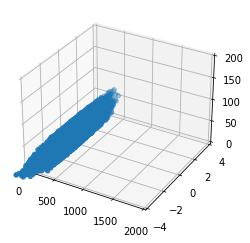

In [24]:
ax = plt.axes(projection='3d')
ax.scatter3D(sample[:, 0], sample[:, 1], sample[:, 3])
ax.set_xlim(0, 2000)
ax.set_ylim(-4, 4)
ax.set_zlim(0, 200)

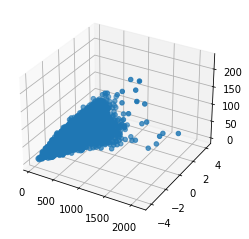

In [25]:
ax = plt.axes(projection='3d')
ax.scatter3D(gen[:, 0], gen[:, 1], gen[:, 3])